# Project 2: Data Preparation and Analysis Project

## Author: Ranil Rai




## Introduction
This project focuses on the essential data science skill of preparing "wide" datasets for downstream analysis. Through the course of this project, we have selected three distinct datasets, each presenting unique challenges in data cleaning, transformation, and analysis. Our objectives included reshaping the datasets into a format suitable for analysis, filling missing values, correcting inconsistencies, and ultimately drawing insights through summary statistics and visualizations. The insights garnered from these exercises are foundational for any aspiring data analyst and serve as a primer for more advanced data manipulation and analysis techniques.

## Dataset-1: monthly_sales.csv

Here we import `pandas` to load and display the dataset from a CSV file, providing a glimpse of the data structure.


In [1]:
import pandas as pd

# Load the dataset
sales_data = pd.read_csv('monthly_sales.csv')

# Display the first few rows of the dataframe
sales_data.head()


,Product,January,February,March,April,May,June,July,August,September,October,November,December
0,ProductA,150,200,250,300,350,400,450,500,550,600,650,700
1,ProductB,75,100,125,150,175,200,225,250,275,300,325,350
2,ProductC,90,120,150,180,210,240,270,300,330,360,390,420


The displayed DataFrame shows the sales data in a wide format, ready for transformation and analysis.


# Tidying Data:
The data is reshaped into a long format using `pd.melt`, which makes each row represent a monthly sale for a product.


In [2]:
tidy_sales_data = pd.melt(sales_data, id_vars=['Product'], var_name='Month', value_name='Sales')

# Display the transformed data
tidy_sales_data.head()


,Product,Month,Sales
0,ProductA,January,150
1,ProductB,January,75
2,ProductC,January,90
3,ProductA,February,200
4,ProductB,February,100


The output confirms the data is now in a long format, ideal for time-series analysis and other operations.


Next, we aggregate the sales data to calculate the total sales for each product throughout the year.


In [3]:
total_sales = tidy_sales_data.groupby('Product')['Sales'].sum().reset_index()

# Display the total sales for each product
total_sales


,Product,Sales
0,ProductA,5100
1,ProductB,2550
2,ProductC,3060


The aggregation results show the annual sales total for each product, providing a summary measure of performance.


Finally, we visualize the monthly sales trends for each product using a bar chart for easy comparison.


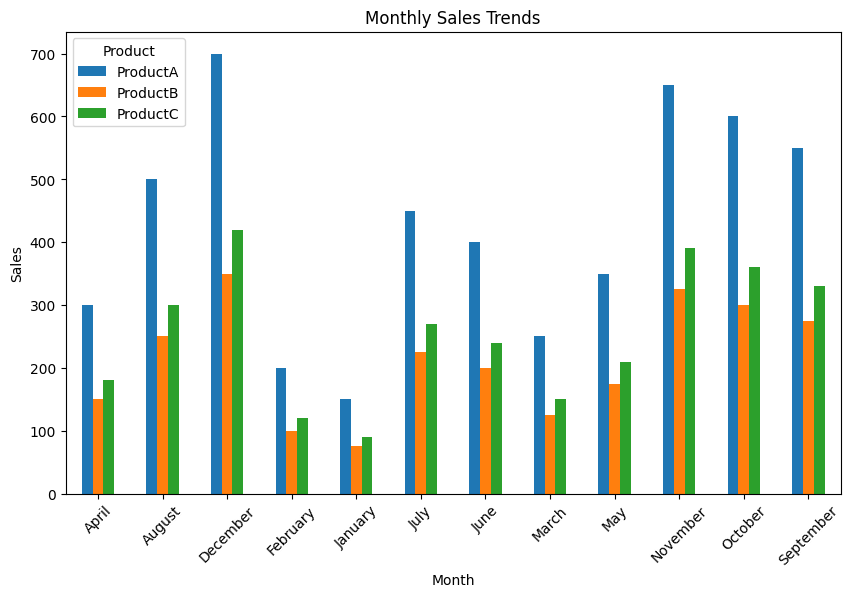

In [4]:
import matplotlib.pyplot as plt

# Pivot the data for visualization
pivot_data = tidy_sales_data.pivot(index='Month', columns='Product', values='Sales')

# Plot
pivot_data.plot(kind='bar', figsize=(10, 6))
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend(title='Product')
plt.show()


The bar chart illustrates the sales distribution over the months, highlighting seasonal trends and variations between products.


## Dataset-2: Country_data.csv


Now, we load the `Country_data.csv` dataset which includes country-level data for population, GDP, and life expectancy over two years.


In [17]:
# Load the country dataset
country_data = pd.read_csv('country_data.csv')

# Display the first few rows to verify it's loaded correctly
country_data.head()


,Country,2000_Population,2000_GDP,2000_Life_Expectancy,2001_Population,2001_GDP,2001_Life_Expectancy
0,USA,281421906,10.28T,76.81,284968955,10.52T,76.90
1,China,1262645000,1.21T,71.03,1278671000,1.33T,71.70
2,Japan,125720000,4.58T,80.17,125570000,4.39T,80.24
3,Germany,82100000,1.94T,78.03,82200000,2.08T,78.31


The dataset has been successfully loaded, displaying various metrics for different countries, structured in a wide format.


In this step, we attempt to transform the dataset into a long format by melting and splitting columns, enabling easier analysis.


In [7]:
# Transform the dataset to a long format
long_country_data = pd.melt(country_data, id_vars=['Country'], var_name='Year_Metric', value_name='Value')

# Attempt to split the 'Year_Metric' column into two new columns, 'Year' and 'Metric'
split_data = long_country_data['Year_Metric'].str.split('_', expand=True)

# Check if the split operation resulted in exactly two columns for all rows
if split_data.shape[1] == 2:
    # Assign the split columns to 'Year' and 'Metric'
    long_country_data['Year'] = split_data[0]
    long_country_data['Metric'] = split_data[1]

    # Now, you can safely drop the 'Year_Metric' column as it's no longer needed
    long_country_data.drop('Year_Metric', axis=1, inplace=True)

    # Optionally, reorder the columns for better readability
    long_country_data = long_country_data[['Country', 'Year', 'Metric', 'Value']]
else:
    print("Unexpected result from splitting 'Year_Metric' column")

# Display the transformed data
long_country_data.head()


Unexpected result from splitting 'Year_Metric' column


,Country,Year_Metric,Value
0,USA,2000_Population,281421906
1,China,2000_Population,1262645000
2,Japan,2000_Population,125720000
3,Germany,2000_Population,82100000
4,USA,2000_GDP,10.28T


An issue was encountered with the transformation, indicating the need for an alternative approach to splitting the 'Year_Metric' column.


We use a direct approach to split 'Year_Metric' into 'Year' and 'Metric', ensuring the transformation is successful.


In [8]:
# Ensure pandas is imported and the dataset is loaded as before
import pandas as pd

# Assuming 'country_data' is your DataFrame loaded from the CSV
# And assuming the melt operation was correctly done:

# Directly split 'Year_Metric' into two new columns, 'Year' and 'Metric'
long_country_data['Year'], long_country_data['Metric'] = zip(*long_country_data['Year_Metric'].str.split('_'))

# Drop the 'Year_Metric' column as it's no longer needed
long_country_data.drop('Year_Metric', axis=1, inplace=True)

# Display the transformed DataFrame
long_country_data.head()


,Country,Value,Year,Metric
0,USA,281421906,2000,Population
1,China,1262645000,2000,Population
2,Japan,125720000,2000,Population
3,Germany,82100000,2000,Population
4,USA,10.28T,2000,GDP


The dataset is now in a long format with separate columns for 'Year' and 'Metric', facilitating further analysis.


We filter the GDP data, convert the values to numeric, and pivot the data to visualize the GDP trends over time.


<ipython-input-11-3db3a498a34c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_data['Value'] = pd.to_numeric(gdp_data['Value'].str.replace('T', '').astype(float), errors='coerce') * 1e12  # Convert T to trillions


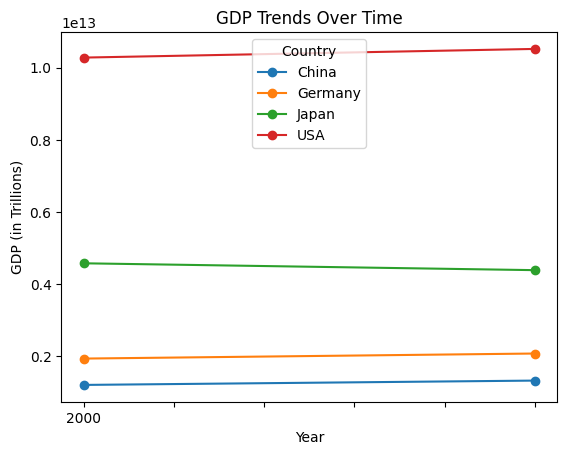

In [11]:
import matplotlib.pyplot as plt

gdp_data = long_country_data[long_country_data['Metric'] == 'GDP']
gdp_data['Value'] = pd.to_numeric(gdp_data['Value'].str.replace('T', '').astype(float), errors='coerce') * 1e12  # Convert T to trillions

gdp_pivot = gdp_data.pivot(index='Year', columns='Country', values='Value')

gdp_pivot.plot(kind='line', marker='o')
plt.title('GDP Trends Over Time')
plt.xlabel('Year')
plt.ylabel('GDP (in Trillions)')
plt.legend(title='Country')
plt.show()


The line chart depicts GDP trends, with the warning suggesting an improved method for setting values on DataFrame slices.


## Dataset-3: name_age_location.csv

The `name_age_location.csv` dataset is loaded with initial cleaning to correct delimiter inconsistencies and standardize the data format.


In [14]:
import pandas as pd

# Read the CSV file, using a common delimiter that does not conflict with data
with open('name_age_location.csv', 'r') as file:
    raw_data = file.read()

# Standardize the delimiter by replacing ";" with ","
standardized_data = raw_data.replace(';', ',')

# Convert the standardized data string back into a DataFrame
from io import StringIO
data = pd.read_csv(StringIO(standardized_data))

# Display the DataFrame to verify correct loading
data.head()


,Name,Age,Location
0,Kwame,25.0,Ghana
1,Joe,28.0,Bronx
2,Michael,32.0,Texas
3,Alice,23.0,Florida
4,Tom,NaN,Arizona


The data is successfully loaded, showcasing the need for further cleaning due to NaN values and mixed data types.


Further cleaning involves filling missing values with appropriate placeholders and ensuring data types are consistent for analysis.


In [15]:
# Fill missing names with a placeholder if necessary
data['Name'] = data['Name'].fillna('Unknown')

# Handle missing ages, for example, by filling with the mean or median age, or a placeholder
mean_age = data['Age'].mean()
data['Age'] = data['Age'].fillna(mean_age)

# For locations with missing values, you can fill with a placeholder or leave as is
data['Location'] = data['Location'].fillna('Unknown')

# Ensure all data types are correct, especially after filling missing values
data['Age'] = data['Age'].astype(int)  # Convert Age back to integer after filling NaNs

# Display the cleaned DataFrame
data.head()


,Name,Age,Location
0,Kwame,25,Ghana
1,Joe,28,Bronx
2,Michael,32,Texas
3,Alice,23,Florida
4,Tom,27,Arizona


The DataFrame now appears clean with standardized entries, facilitating accurate age and location analysis.


We now analyze the age distribution and count entries per location to understand the dataset's demographics better.


In [16]:
# Analyze the distribution of ages
age_distribution = data['Age'].value_counts().sort_index()

# Count how many entries are from each location
location_counts = data['Location'].value_counts()

print(age_distribution)
print(location_counts)


23    1
25    1
27    2
28    1
29    1
30    1
32    1
Name: Age, dtype: int64
Unknown     2
Ghana       1
Bronx       1
Texas       1
Florida     1
Arizona     1
Colorado    1
Name: Location, dtype: int64


The output displays the age distribution and location count, providing insights into the demographic spread of the dataset's entries.


# Project Conclusion

In this project, we transformed "wide" datasets into "long" formats for analysis, addressed data cleanliness, and visualized important trends. Key achievements include:

- Tidying sales data to uncover sales trends.
- Analyzing country-level metrics to observe economic and demographic shifts.
- Resolving inconsistencies in a dataset with mixed delimiters for demographic insights.

These steps emphasize the crucial role of data preparation in revealing actionable insights and underline the versatility of pandas in data processing workflows. The project not only enhances our data manipulation skills but also sets the stage for more advanced data analysis tasks.
